# Import

In [1]:
import os
import io
import re
import nltk
import gzip
import spacy
import string
import random
import secrets
import datetime
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import plotly.io as pio
from sklearn import tree
from typing import Counter
import plotly.express as px
from fuzzywuzzy import fuzz
from joblib import dump, load
from bs4 import BeautifulSoup
import category_encoders as ce
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import plotly.graph_objects as go
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from textblob import TextBlob, Word
from scipy.cluster import hierarchy
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from scipy.spatial.distance import pdist, squareform
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from flask import Flask, request, render_template, session, url_for, redirect
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, Normalizer,
                                   PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder


c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Fonction IA

Créer une fonction prendra en paramètre un dataset, de choisir une ou plusieurs colonnes de features et une colonne de target, de choisir une tâche parmi **régression** (4 algorithmes différents), **classification** (4 algorithmes différents) et **clustering** (2 algorithmes différents), et enfin de faire une prédiction et d'observer les performances des modèles avec au moins 3 métriques. On pourra récupérer le modèle le plus performant ou tous les modèles. Il sera possible de les exporter via joblib ou pickle.

La fonction nous permettra également de faire de la réduction de dimension (1 algorithme) avant de lancer un modèle en indiquant un taux de variance expliqué précis, de reshape les données pour que l'entrainement fonctionne, et de connaitre les meilleurs hyperparamètres via grid search.

Il faut par contre que les données du dataset soient complètent et dans le bon type.

## Choix dataset


In [ ]:
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output


def interactive_load_seaborn_dataset():
    # Fonction interne pour lister les datasets Seaborn
    def list_datasets_seaborn():
        return sns.get_dataset_names()

    # Fonction interne pour afficher le dataset sélectionné
    def charge_dataset(b):
        global df_original
        with output_area:
            # Efface l'ancienne sortie avant d'afficher la nouvelle
            clear_output(wait=True)
            dataset_name = liste_deroulante.value
            if dataset_name in list_datasets_seaborn():
                df_original = sns.load_dataset(dataset_name)
                print(df_original.head())
            else:
                print("Le dataset demandé n'est pas disponible.")

    # Widgets pour la sélection du dataset
    liste_deroulante = widgets.Dropdown(
        options=list_datasets_seaborn(),
        description='Datasets:',
    )

    # Bouton pour charger le dataset
    bouton_chargment = widgets.Button(description="Charger le dataset")
    bouton_chargment.on_click(charge_dataset)  # Associer la fonction au bouton

    # Zone d'affichage pour les résultats
    output_area = widgets.Output()

    # Affichage des widgets
    display(liste_deroulante, bouton_chargment, output_area)


In [ ]:
# Appel de la fonction pour créer l'interface interactive
df_original = interactive_load_seaborn_dataset()
df = df_original.copy()


In [16]:
df = df_original.copy()


,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [ ]:
# import seaborn as sns
# import ipywidgets as widgets
# from IPython.display import display
# # crée la liste des datasets seaborn


# def list_datasets_seaborn():
#     datasets_seaborn = sns.get_dataset_names()
#     return datasets_seaborn


# # liste déroulante avec widget
# liste_deroulante = widgets.Dropdown(
#     options=list_datasets_seaborn(),
#     description='Datasets      :',
# )
# display(liste_deroulante)

# # Charger le dataset sélectionné


# def charge_dataset(b):
#     global df_original
#     datasets_seaborn = list_datasets_seaborn()
#     print(f"\n datasets_seaborn:\n{datasets_seaborn} \n")
#     if liste_deroulante.value in datasets_seaborn:
#         # Charger le dataset dans df
#         df_original = sns.load_dataset(liste_deroulante.value)
#         print(df_original.head())
#     else:
#         print("Le dataset demandé n'est pas disponible.")


# # Bouton pour charger le dataset
# bouton_chargment = widgets.Button(description="Charger le dataset")
# bouton_chargment.on_click(charge_dataset)
# display(bouton_chargment)


In [6]:
df = df_original.copy()
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Analyse du dataset et classification automatique

In [40]:
import pandas as pd
import numpy as np


def determine_dataset_type(dataset):
    # Vérifie si le dataset est un DataFrame pandas (données structurées)
    if isinstance(dataset, pd.DataFrame):
        # Vérifie la présence de colonnes temporelles
        if any(pd.api.types.is_datetime64_any_dtype(dataset[col]) for col in dataset.columns):
            return "Time Series (Temporal Data)"
        # Vérifie la présence de colonnes spatiales (latitude/longitude)
        if 'latitude' in dataset.columns and 'longitude' in dataset.columns:
            return "Spatial Data"
        return "Structured Data"

    # Vérifie si le dataset est une série de textes ou de fichiers (données non structurées)
    if isinstance(dataset, (list, pd.Series)) and all(isinstance(x, str) for x in dataset):
        return "Unstructured Data (Text or Files)"

    # Vérifie si le dataset est sous forme de dictionnaires ou de JSON (semi-structuré)
    if isinstance(dataset, (dict, list)) and all(isinstance(x, (dict, list)) for x in dataset):
        return "Semi-Structured Data (e.g., JSON)"

    return "Unknown Type"


type_dataset = determine_dataset_type(df)

print(f"\ntype du dataset :\n{type_dataset} \n")



type du dataset :
Structured Data 



In [41]:
# Résumé des informations du dataframe
your_dataframe = df
print("#"+"-"*79)
print(f"\n====shape====: {your_dataframe.shape} \n====list columns==== :\n{
      your_dataframe.columns.tolist()} ")
print("#"+"#"*20)
print(f"====liste des colonnes numeriques====: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print("#"+"#"*20)
print(f"====liste des colonnes non numeriques====: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print("#"+"#"*20)
print("valeurs uniques des colonnes:")
for col in your_dataframe.columns:
    print("#"+"#"*20)
    print(f"====colonne====: {col} \n====nb valeur uniques====:{
          your_dataframe[col].nunique()} ")
    if your_dataframe[col].nunique() < 15:
        print(r", ".join(
            f"'{item}'" for item in your_dataframe[col].unique().tolist()))
    else:
        unique_values = your_dataframe[col].unique()[:15]
        print("====15 premiers====: \n" +
              ", ".join(f"'{item}'" for item in unique_values))
print("#"+"-"*79)
print(f"====Noms des colonnes avec au moins une valeur NA==== : {
      your_dataframe.columns[your_dataframe.isna().any()].tolist()}")
print("#"+"#"*20)
print(f"====Nombre de lignes avec au moins une valeur NA==== : {
      your_dataframe.isna().any(axis=1).sum()}")
print("#"+"#"*20)
print(f"====Colonne avec des na==== :{your_dataframe.isna().sum()} \n")
print("#"+"#"*20)
print(f"\ndf ====head==== :\n{your_dataframe.head(2)} \n")
print("#"+"#"*20)
print(f"\ndf ====describe==== :\n{your_dataframe.describe()} \n")
print("#"+"-"*79)


#-------------------------------------------------------------------------------

====shape====: (848, 5) 
====list columns==== :
['align', 'choice', 'time', 'coherence', 'firing_rate'] 
#####################
====liste des colonnes numeriques====: 
['time', 'coherence', 'firing_rate']

#####################
====liste des colonnes non numeriques====: 
['align', 'choice'] 
#####################
valeurs uniques des colonnes:
#####################
====colonne====: align 
====nb valeur uniques====:2 
'dots', 'sacc'
#####################
====colonne====: choice 
====nb valeur uniques====:2 
'T1', 'T2'
#####################
====colonne====: time 
====nb valeur uniques====:67 
====15 premiers====: 
'-80', '-60', '-40', '-20', '0', '20', '40', '60', '80', '100', '120', '140', '160', '180', '200'
#####################
====colonne====: coherence 
====nb valeur uniques====:6 
'0.0', '3.2', '6.4', '12.8', '25.6', '51.2'
#####################
====colonne====: firing_rate 
====nb valeur uniques====:8

## Preprocessing des datasets
### Preprocessing pour les Données structurées

In [42]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def preprocess_structured_data(dataset):
    # Séparer les colonnes numériques et catégorielles
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    categorical_cols = dataset.select_dtypes(exclude=[np.number]).columns

    # Imputation
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    dataset[numeric_cols] = num_imputer.fit_transform(dataset[numeric_cols])
    dataset[categorical_cols] = cat_imputer.fit_transform(
        dataset[categorical_cols])

    # Normalisation pour les données numériques
    scaler = StandardScaler()
    dataset[numeric_cols] = pd.DataFrame(scaler.fit_transform(
        dataset[numeric_cols]), columns=numeric_cols)

    # Encodage One-Hot pour les données catégorielles
    encoder = OneHotEncoder()
    encoded_cat = encoder.fit_transform(dataset[categorical_cols]).toarray()
    encoded_cat_df = pd.DataFrame(
        encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

    # Concaténer les données numériques et catégorielles traitées
    dataset_preprocessed = pd.concat(
        [dataset[numeric_cols], encoded_cat_df], axis=1)

    return dataset_preprocessed


### Preprocessing pour les Données non structurées

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer


def preprocess_unstructured_data(dataset):
    # Prétraitement pour les données textuelles non structurées
    vectorizer = TfidfVectorizer(stop_words='english')
    dataset = vectorizer.fit_transform(dataset)
    return dataset


### Preprocessing pour les Données de type times series

In [44]:
def preprocess_temporal_data(dataset):
    # Prétraitement pour les données temporelles
    dataset.fillna(method='ffill', inplace=True)
    return dataset


### Preprocessing pour les Données Spatiales

In [45]:
from sklearn.preprocessing import MinMaxScaler


def preprocess_spatial_data(dataset):
    # Supposons que dataset est un DataFrame avec des colonnes 'latitude' et 'longitude'
    scaler = MinMaxScaler()
    dataset[['latitude', 'longitude']] = scaler.fit_transform(
        dataset[['latitude', 'longitude']])

    # Calcul d'une caractéristique dérivée, par exemple, la distance depuis le centre-ville
    city_center = (48.8566, 2.3522)  # Coordonnées de Paris, par exemple
    dataset['distance_from_center'] = np.sqrt(
        (dataset['latitude'] - city_center[0])**2 + (dataset['longitude'] - city_center[1])**2)

    return dataset


# Exemple d'utilisation
spatial_data = pd.DataFrame({
    'latitude': np.random.uniform(48.8, 48.9, 100),
    'longitude': np.random.uniform(2.3, 2.4, 100)
})
preprocessed_spatial_data = preprocess_spatial_data(spatial_data)


### preprocessing pour les Données Semi-Structurées (JSON)

In [46]:
import json
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def preprocess_json_data(json_data):
    # Convertir le JSON en DataFrame
    dataset = pd.json_normalize(json_data)

    # Gérer les valeurs manquantes
    imputer = SimpleImputer(strategy='most_frequent')
    dataset = pd.DataFrame(imputer.fit_transform(
        dataset), columns=dataset.columns)

    # Encoder les variables catégorielles
    encoder = OneHotEncoder()
    encoded_columns = encoder.fit_transform(dataset[['interests']]).toarray()
    dataset = dataset.join(pd.DataFrame(
        encoded_columns, columns=encoder.get_feature_names_out(['interests'])))

    return dataset


# Exemple d'utilisation
json_data = [
    {"name": "Alice", "age": 30, "interests": "music"},
    {"name": "Bob", "age": 25, "interests": "sports"},
    # ... autres données
]
preprocessed_json_data = preprocess_json_data(json_data)


### Fonction globale de preprocessing

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime


def preprocess_dataset(dataset):
    dataset_type = determine_dataset_type(dataset)

    if dataset_type == "Structured Data":
        dataset_preprocessed = preprocess_structured_data(dataset)
        return dataset_preprocessed

    elif dataset_type == "Unstructured Data (Text or Files)":
        dataset_preprocessed = preprocess_unstructured_data(dataset)
        return dataset_preprocessed

    elif dataset_type == "Time Series (Temporal Data)":
        dataset_preprocessed = preprocess_temporal_data(dataset)
        return dataset_preprocessed

    elif dataset_type == "Spatial Data":
        dataset_preprocessed = preprocess_spatial_data(dataset)
        return dataset_preprocessed

    elif dataset_type == "Semi-Structured Data (e.g., JSON)":
        dataset_preprocessed = preprocess_json_data(dataset)
        return dataset_preprocessed

    else:
        raise ValueError(
            "Type de dataset non reconnu ou non pris en charge pour le prétraitement")

    return dataset_preprocessed


In [48]:
df_pre = preprocess_dataset(df)
df_pre


,time,coherence,firing_rate,align_dots,align_sacc,choice_T1,choice_T2
0,-0.541967,-0.835132,-0.525669,1.0,0.0,1.0,0.0
1,-0.541967,-0.627938,-0.648217,1.0,0.0,1.0,0.0
2,-0.541967,-0.420743,-0.436523,1.0,0.0,1.0,0.0
3,-0.541967,-0.006353,-0.571318,1.0,0.0,1.0,0.0
4,-0.541967,0.822427,-0.372670,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
843,0.794044,-0.627938,-0.518163,0.0,1.0,0.0,1.0
844,0.794044,-0.420743,-0.984208,0.0,1.0,0.0,1.0
845,0.794044,-0.006353,-0.908339,0.0,1.0,0.0,1.0
846,0.794044,0.822427,-1.031172,0.0,1.0,0.0,1.0


## Fonctions Machine learning

In [3]:
['regression',
 'classification',
 'clustering']


['regression', 'classification', 'clustering']

In [92]:
import joblib
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score, silhouette_score


# def entrainer_et_evaluer_modeles(donnees, colonnes_features,colonne_cible, tache, choix_modele, ):
def entrainer_et_evaluer_modeles(donnees, colonnes_features, tache, choix_modele, colonne_cible=None):
    """
    Entrainer et évaluer des modèles de machine learning en fonction de la tâche et du choix du modèle.

    :param donnees: DataFrame - le dataset à utiliser
    :param colonnes_features: list - liste des noms de colonnes à utiliser comme features
    :param colonne_cible: str - nom de la colonne cible pour la prédiction
    :param tache: str - type de tâche ('regression', 'classification', 'clustering')
    :param choix_modele: str - choix du modèle
    :return: dict - dictionnaire contenant les résultats d'évaluation pour le modèle choisi
    """
    # Séparer les features et la cible
    X = donnees[colonnes_features]
    y = donnees[colonne_cible] if colonne_cible is not None else None

    # Division des données
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Séparer les features et la cible si colonne_cible n'est pas None et la tâche n'est pas clustering ou DBSCAN
    if colonne_cible is not None and tache not in ['clustering', 'DBSCAN']:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    else:
    # Cas où colonne_cible est None
        X_train, X_test = train_test_split(X, test_size=0.2)


    # Sélectionner le modèle et les hyperparamètres en fonction de la tâche et du choix de modèle
    modele, parametres = selectionner_modele_et_hyperparametres(
        tache, choix_modele)

    # Création du pipeline avec ACP
    pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('pca', PCA()),
        ('clf', modele)
    ])

    if tache != 'clustering':
        grid_search = GridSearchCV(pipeline, parametres, cv=5)
        grid_search.fit(X_train, y_train)
        print(f"Meilleurs paramètres {"-"*50}: {grid_search.best_params_}")
        print(f"Meilleur score (train) {
              "-"*50}: {grid_search.best_score_:.2%}")
        meilleur_modele = grid_search.best_estimator_
        score_test = meilleur_modele.score(X_test, y_test)
        print(f"Score sur l'ensemble de test {"-"*50}: {score_test:.2%}")
        return grid_search.best_score_, grid_search.best_params_, meilleur_modele,X_train
    else:
        modele.fit(X_train)
        labels = modele.labels_ if hasattr(modele, 'labels_') else None

        # Vérifier que le nombre de clusters est approprié
        if labels is not None and len(set(labels)) > 1 and len(set(labels)) < len(X_train):
            score = silhouette_score(X_train, labels)
            print(f"Score de silhouette {"-"*50}: {score:.2%}")
        else:
            score = None
            print("Score de silhouette non calculable.")
        return score, None, modele,X_train


def selectionner_modele_et_hyperparametres(tache, choix_modele):
    modeles = {
        'regression': {
            'RegressionLineaire': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(),
            'SVR': SVR()
        },
        'classification': {
            'RegressionLogistique': LogisticRegression(),
            'KNN': KNeighborsClassifier(),
            'ArbreDecision': DecisionTreeClassifier(),
            'ForetAleatoire': RandomForestClassifier()
        },
        'clustering': {
            'KMeans': KMeans(),
            'DBSCAN': DBSCAN()
        }
    }

    hyperparametres = {
        'RegressionLineaire': {'pca__n_components': [2, 3, 4, 5]},
        'Ridge': {'pca__n_components': [2, 3, 4, 5], 'clf__alpha': [0.01, 0.1, 1, 10]},
        'Lasso': {'pca__n_components': [2, 3, 4, 5], 'clf__alpha': [0.01, 0.1, 1, 10]},
        'SVR': {'pca__n_components': [2, 3, 4, 5], 'clf__C': [0.1, 1, 10, 100], 'clf__gamma': [0.01, 0.1, 1]},
        'RegressionLogistique': {'pca__n_components': [2, 3, 4, 5], 'clf__C': [0.1, 1, 10, 100], 'clf__max_iter': [1000]},
        'KNN': {'pca__n_components': [2, 3, 4, 5], 'clf__n_neighbors': [3, 5, 7, 9]},
        'ArbreDecision': {'pca__n_components': [2, 3, 4, 5], 'clf__max_depth': [None, 10, 20, 30]},
        'ForetAleatoire': {'pca__n_components': [2, 3, 4, 5], 'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [None, 10, 20, 30]},
        'KMeans': {'pca__n_components': [2, 3, 4, 5], 'clf__n_clusters': [2, 3, 4, 5], 'clf__n_init': [10]},
        'DBSCAN': {'pca__n_components': [2, 3, 4, 5], 'clf__eps': [0.1, 0.2, 0.5], 'clf__min_samples': [5, 10, 15]}
    }

    if choix_modele in modeles[tache]:
        modele = modeles[tache][choix_modele]
        parametres = hyperparametres[choix_modele]
    else:
        raise ValueError(
            "Combinaison de tâche et de modèle non prise en charge")

    return modele, parametres


### Préparation dataset


In [17]:
import seaborn as sns
import pandas as pd
import numpy as np

# Résumé des informations du dataframe
# ====shape====: (344, 7)
# ====list columns==== :
# ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
# #####################
# ====liste des colonnes numeriques====:
# ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# #####################
# ====liste des colonnes non numeriques====:
# ['species', 'island', 'sex']

# Chargement du dataset des pingouins
donnees_pingouins = sns.load_dataset('penguins')

# Nettoyage et prétraitement des données (suppression des valeurs NA et encodage des variables catégorielles)
donnees_pingouins.dropna(inplace=True)
donnees_pretraitees = pd.get_dummies(donnees_pingouins)

# Sélection des colonnes de features et de la colonne cible
colonnes_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
                     'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_Female', 'sex_Male']
colonne_cible = 'species_Adelie'


### Preparation input pour choix de l'affichage

ajout choix optionnel

In [50]:
def afficher_menu_et_choisir_modele(tache_choix=None, modele_choix=None):
    taches = {
        '1': 'regression',
        '2': 'classification',
        '3': 'clustering'
    }
    modeles_par_tache = {
        'regression': {
            '1': 'RegressionLineaire',
            '2': 'Ridge',
            '3': 'Lasso',
            '4': 'SVR'
        },
        'classification': {
            '1': 'RegressionLogistique',
            '2': 'KNN',
            '3': 'ArbreDecision',
            '4': 'ForetAleatoire'
        },
        'clustering': {
            '1': 'KMeans',
            '2': 'DBSCAN'
        }
    }

    if not tache_choix:
        print("Choisissez le type de tâche:")
        for k, v in taches.items():
            print(f"{k}. {v}")
        tache_choix = input("Entrez le numéro de la tâche: ")

    tache = taches.get(tache_choix)

    if tache:
        if not modele_choix:
            print(f"Choisissez un modèle pour {tache}:")
            for k, v in modeles_par_tache[tache].items():
                print(f"{k}. {v}")
            modele_choix = input("Entrez le numéro du modèle: ")

        modele = modeles_par_tache[tache].get(modele_choix)

        return tache, modele
    else:
        print("Choix de tâche non valide.")
        return None, None


### Test via le menu input 


In [73]:
# Exécution du menu et de la fonction d'entraînement
tache_choisie, modele_choisi = afficher_menu_et_choisir_modele()
if modele_choisi:
    entrainer_et_evaluer_modeles(
        donnees_pretraitees, colonnes_features,  tache_choisie, modele_choisi,colonne_cible)


Choisissez le type de tâche:
1. regression
2. classification
3. clustering
Choisissez un modèle pour regression:
1. RegressionLineaire
2. Ridge
3. Lasso
4. SVR
Meilleurs paramètres --------------------------------------------------: {'pca__n_components': 5}
Meilleur score (train) --------------------------------------------------: 82.52%
Score sur l'ensemble de test --------------------------------------------------: 88.25%


### Teste de toutes les possibilités:

In [74]:
# Test de toutes les possibilités

meilleur_score = -np.inf
meilleure_combinaison = None
meilleurs_hyperparametres = None

for tache in ['1', '2', '3']:
    for modele in ['1', '2', '3', '4']:
        tache_choisie, modele_choisi = afficher_menu_et_choisir_modele(
            tache, modele)
        if modele_choisi:
            print(f"Test avec tâche {tache_choisie} et modèle {modele_choisi}")
            score, hyperparametres, _,_ = entrainer_et_evaluer_modeles(
                donnees_pretraitees, colonnes_features, tache_choisie, modele_choisi, colonne_cible)
            if score is not None and score > meilleur_score:
                meilleur_score = score
                meilleure_combinaison = (tache_choisie, modele_choisi)
                meilleurs_hyperparametres = hyperparametres

# Afficher la meilleure combinaison et les hyperparamètres correspondants
print(f"Meilleure combinaison: Tâche {
      meilleure_combinaison[0]}, Modèle {meilleure_combinaison[1]}")
print(f"Meilleurs hyperparamètres: {meilleurs_hyperparametres}")
print(f"Meilleur score: {meilleur_score}")


Test avec tâche regression et modèle RegressionLineaire
Meilleurs paramètres --------------------------------------------------: {'pca__n_components': 5}
Meilleur score (train) --------------------------------------------------: 82.84%
Score sur l'ensemble de test --------------------------------------------------: 85.90%
Test avec tâche regression et modèle Ridge
Meilleurs paramètres --------------------------------------------------: {'clf__alpha': 1, 'pca__n_components': 5}
Meilleur score (train) --------------------------------------------------: 83.14%
Score sur l'ensemble de test --------------------------------------------------: 87.23%
Test avec tâche regression et modèle Lasso
Meilleurs paramètres --------------------------------------------------: {'clf__alpha': 0.01, 'pca__n_components': 5}
Meilleur score (train) --------------------------------------------------: 83.40%
Score sur l'ensemble de test --------------------------------------------------: 86.55%
Test avec tâche r

c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Graphiques
### Exploration des Données


Histogrammes (pour bill_length_mm,

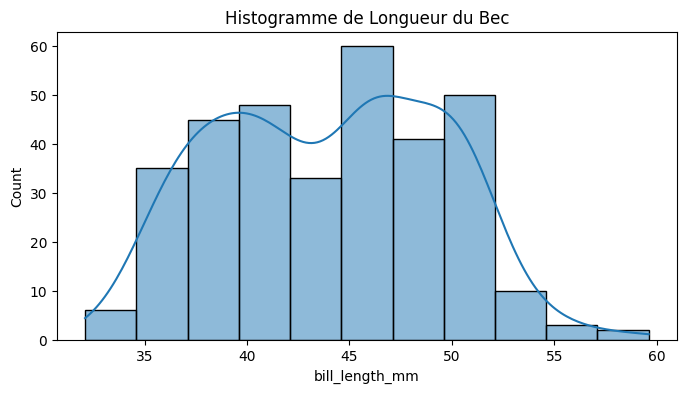

In [98]:
plt.figure(figsize=(8, 4))
sns.histplot(donnees_pingouins['bill_length_mm'], kde=True)
plt.title('Histogramme de Longueur du Bec')
plt.show()


Boxplots (pour bill_depth_mm,

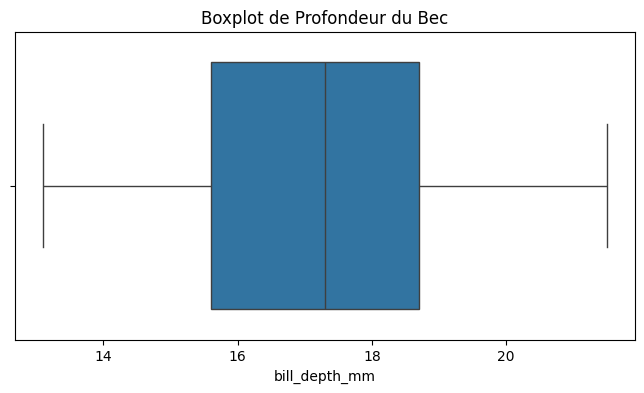

In [99]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=donnees_pingouins['bill_depth_mm'])
plt.title('Boxplot de Profondeur du Bec')
plt.show()


Graphes à Barres 

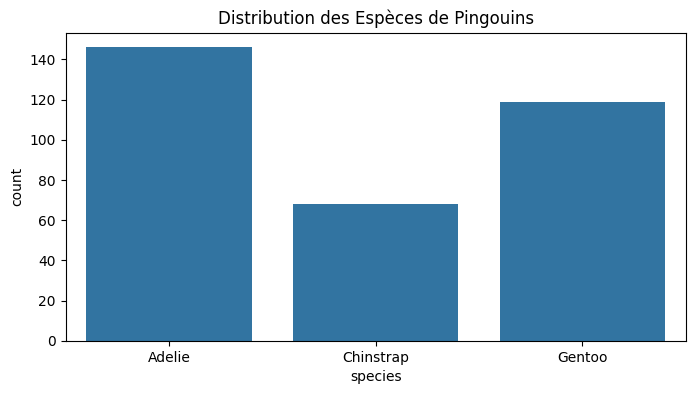

In [100]:
plt.figure(figsize=(8, 4))
sns.countplot(x=donnees_pingouins['species'])
plt.title('Distribution des Espèces de Pingouins')
plt.show()


Graphes de Dispersion (pour bill_length_mm et flipper_length_mm)

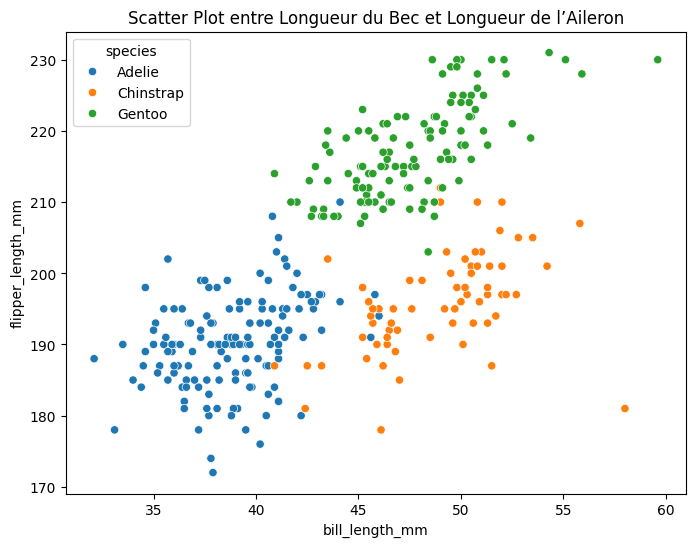

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm',
                hue='species', data=donnees_pingouins)
plt.title('Scatter Plot entre Longueur du Bec et Longueur de l’Aileron')
plt.show()


### Évaluation des Modèles

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Matrice de Confusion')
plt.ylabel('Vérité')
plt.xlabel('Prédiction')
plt.show()


### Résultats des Modèles de Clustering

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm',
                hue=kmeans.labels_, data=donnees_pingouins)
plt.title('Clusters de Pingouins par KMeans')
plt.show()


###  Analyse en Composantes Principales (ACP)

Variance Expliquée par les Composantes (après l'ajustement de PCA sur les données)

In [77]:
import matplotlib.pyplot as plt


def plot_pca_variance(pca):
    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_)
    plt.ylabel('Variance expliquée')
    plt.xlabel('Composantes principales')
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red',
             label="Cumul de la variance expliquée")
    plt.legend(loc='upper left')
    plt.show()


In [85]:
donnees_pingouins.select_dtypes('float64', 'int64')


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [86]:
donnees_pingouins.select_dtypes('object')


,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male
...,...,...,...
338,Gentoo,Biscoe,Female
340,Gentoo,Biscoe,Female
341,Gentoo,Biscoe,Male
342,Gentoo,Biscoe,Female


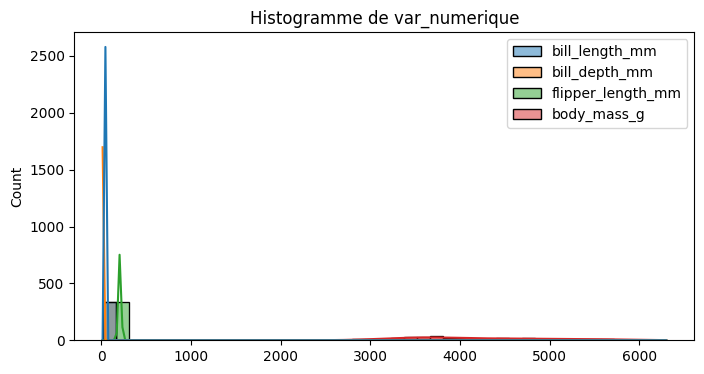

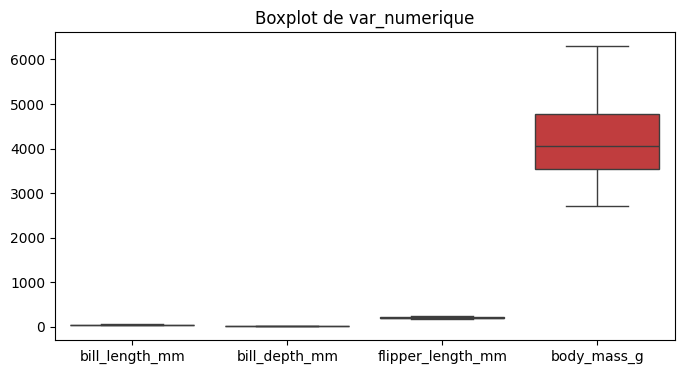

In [89]:
# Histogramme
plt.figure(figsize=(8, 4))
sns.histplot(donnees_pingouins.select_dtypes('float64', 'int64'), kde=True)
plt.title('Histogramme de var_numerique')
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(donnees_pingouins.select_dtypes('float64', 'int64'))
plt.title('Boxplot de var_numerique')
plt.show()


Graphes de Dispersion 

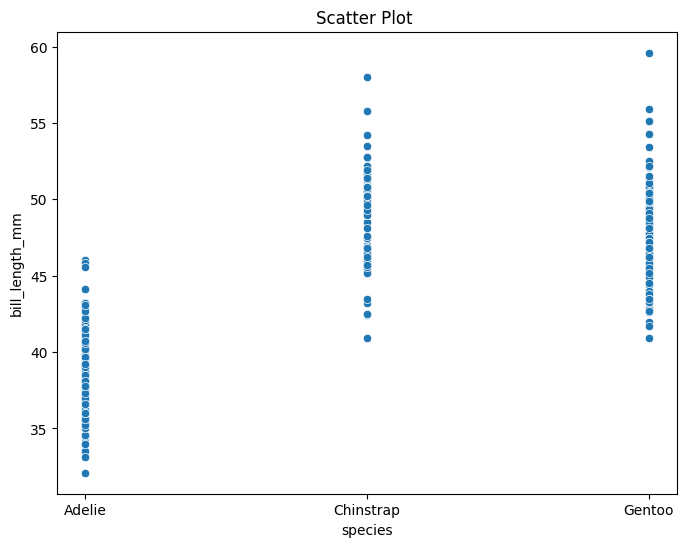

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='species', y='bill_length_mm', data=donnees_pingouins)
plt.title('Scatter Plot ')
plt.show()


Graphes de Corrélation

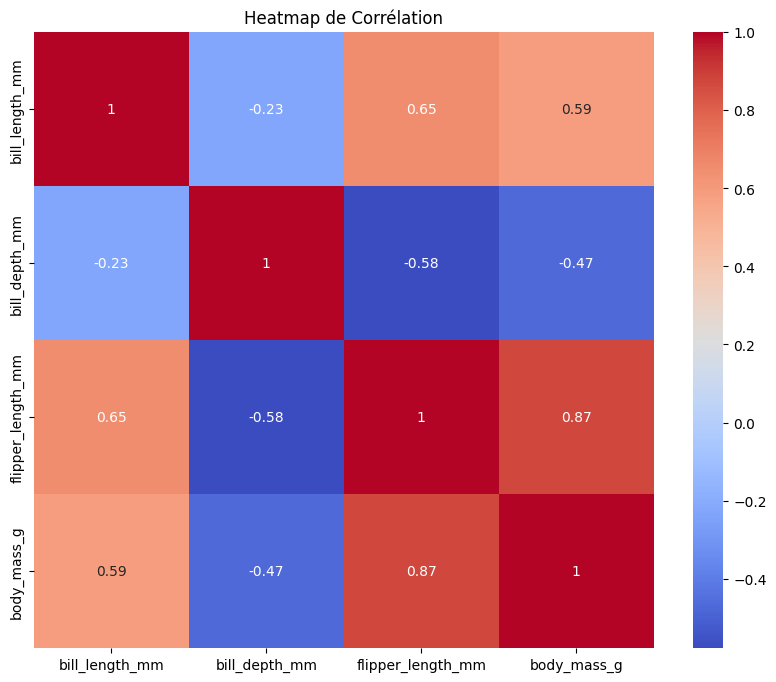

In [95]:
corr_matrix = donnees_pingouins.select_dtypes('float64', 'int64').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Corrélation')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcul des taux de vrais positifs et faux positifs
fpr, tpr, seuils = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrais Positif')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


## Fonction graphique globale

In [97]:
def generer_graphiques(donnees, X_train, modele, tache ):
    # Sous-fonction pour afficher les histogrammes
    def afficher_histogrammes():
        for colonne in donnees.select_dtypes(include='number').columns:
            sns.histplot(donnees[colonne], kde=True)
            plt.title(f'Histogramme de {colonne}')
            plt.show()

    # Sous-fonction pour afficher les boxplots
    def afficher_boxplots():
        for colonne in donnees.select_dtypes(include='number').columns:
            sns.boxplot(x=donnees[colonne])
            plt.title(f'Boxplot de {colonne}')
            plt.show()

    # Sous-fonction pour afficher la variance expliquée par PCA (si PCA est utilisé)
    def afficher_variance_pca():
        if 'pca' in [step[0] for step in modele.steps]:
            pca = modele.named_steps['pca']
            plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
                    pca.explained_variance_ratio_)
            plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
                     np.cumsum(pca.explained_variance_ratio_),
                     c='red',
                     label="Cumul de la variance expliquée")
            plt.xlabel('Composantes principales')
            plt.ylabel('Variance expliquée')
            plt.title('Variance Expliquée par les Composantes PCA')
            plt.legend(loc='upper left')
            plt.show()

    # Sous-fonction pour afficher les clusters (si un modèle de clustering est utilisé)
    def afficher_clusters():
        if tache == 'clustering':
            labels = modele.named_steps['clf'].labels_
            sns.scatterplot(x=X_train['bill_length_mm'],
                            y=X_train['flipper_length_mm'], hue=labels)
            plt.title('Clusters des Pingouins')
            plt.show()

    # Appeler les sous-fonctions en fonction de la tâche et du modèle
    if tache in ['regression', 'classification']:
        afficher_histogrammes()
        afficher_boxplots()
        afficher_variance_pca()
    elif tache == 'clustering':
        afficher_clusters()


### Teste toutes les possiblités et sort les graphes

In [ ]:
def tester_et_visualiser_modeles(donnees, colonnes_features, colonne_cible):
    meilleur_score = -np.inf
    meilleure_combinaison = None
    meilleurs_hyperparametres = None
    meilleur_modele = None
    X_train_meilleur = None
    y_train_meilleur = None

    for tache in ['1', '2', '3']:
        for modele in ['1', '2', '3', '4']:
            tache_choisie, modele_choisi = afficher_menu_et_choisir_modele(
                tache, modele)
            if modele_choisi:
                print(f"Test avec tâche {
                      tache_choisie} et modèle {modele_choisi}")
                score, hyperparametres, modele_entraine,X_train = entrainer_et_evaluer_modeles(
                    donnees, colonnes_features, tache_choisie, modele_choisi, colonne_cible)
                if score is not None and score > meilleur_score:
                    meilleur_score = score
                    meilleure_combinaison = (tache_choisie, modele_choisi)
                    meilleurs_hyperparametres = hyperparametres
                    meilleur_modele = modele_entraine
                    X_train_meilleur, X_test, y_train_meilleur, y_test = train_test_split(
                        donnees[colonnes_features], donnees[colonne_cible], test_size=0.2)

    # Affichage des résultats
    print(f"Meilleure combinaison: Tâche {
          meilleure_combinaison[0]}, Modèle {meilleure_combinaison[1]}")
    print(f"Meilleurs hyperparamètres: {meilleurs_hyperparametres}")
    print(f"Meilleur score: {meilleur_score}")

    # Générer des graphiques pour la meilleure combinaison
    if meilleur_modele:
        generer_graphiques(donnees, X_train_meilleur, y_train_meilleur,
                           meilleur_modele, meilleure_combinaison[0], meilleure_combinaison[1])


# Appel de la fonction avec les données
tester_et_visualiser_modeles(
    donnees_pretraitees, colonnes_features, colonne_cible)


## Generalisation à n'importe quel dataset

#### détermination colonnes cible et feature et du type de tache

In [29]:
def determiner_tache_et_cible(dataset):
    """
    Déterminer si le dataset est pour une tâche de classification ou de régression ou de clustering,
    et sélectionner la colonne cible appropriée ainsi que les caractéristiques.

    :param dataset: DataFrame - le dataset à examiner.
    :return: (list, str, str) - retourne les caractéristiques, la colonne cible et la tâche.
    """
    colonnes_numeriques = dataset.select_dtypes(
        include=[np.number]).columns.tolist()
    colonnes_catégorielles = dataset.select_dtypes(
        exclude=[np.number, 'datetime']).columns.tolist()

    # Résumé du DataFrame
    print(f"Taille du DataFrame: {dataset.shape}")
    print(f"Liste des colonnes: {dataset.columns.tolist()}")
    print(f"Colonnes numériques: {colonnes_numeriques}")
    print(f"Colonnes non numériques: {colonnes_catégorielles}")
    print(f"Nombre total de valeurs manquantes: {dataset.isna().sum().sum()}")

    # Logique de détermination de la tâche
    if len(dataset) > 30 and len(dataset.columns) > 5:  # Critères pour le clustering
        tache = 'clustering'
        colonnes_features = dataset.columns
        colonne_cible = None
    elif colonnes_catégorielles:
        colonne_cible = colonnes_catégorielles[-1]
        tache = 'classification'
        colonnes_features = [
            col for col in dataset.columns if col != colonne_cible]
    elif colonnes_numeriques:
        colonne_cible = colonnes_numeriques[-1]
        tache = 'regression'
        colonnes_features = [
            col for col in dataset.columns if col != colonne_cible]
    else:
        colonne_cible = dataset.columns[-1]
        tache = 'classification'
        colonnes_features = dataset.columns[:-1]

    return colonnes_features, colonne_cible, tache


lancement choix dataset

In [21]:
# Choix du dataset
df_original = interactive_load_seaborn_dataset()


Dropdown(description='Datasets:', options=('anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes…

Button(description='Charger le dataset', style=ButtonStyle())

Output()

In [ ]:
df.info()


In [86]:
df = df_original.copy()
# df = pd.read_csv("chemin_vers_votre_dataset.csv")
# test entre  le dataset qui est déja pretraite ou non
colonnes_features, colonne_cible, tache = determiner_tache_et_cible(df)
print(f"\nAnalyse, choix de colonnes et de la tache \n")
print(f"Tâche: {tache}")
print(f"Colonne cible: {colonne_cible}")
print(f"Colonnes de features: {colonnes_features}")


Taille du DataFrame: (53940, 10)
Liste des colonnes: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Colonnes numériques: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Colonnes non numériques: ['cut', 'color', 'clarity']
Nombre total de valeurs manquantes: 0

Analyse, choix de colonnes et de la tache 

Tâche: clustering
Colonne cible: None
Colonnes de features: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


#### en fonction du dataset choisi:
* determine les colonnes feature et cible
* determine le type de tache, regression, catégorisation ou clustering
* fait le preprocessing
* analyse diffenrents modeles de machine learning
* sort le meilleur modele et évalue sa performance
* imprime les graphiques les plus courant

In [61]:
# def tester_et_visualiser_modeles_automatiquement(df):
#     '''
#     En fonction du dataset choisi:
#         * determine les colonnes feature et cible
#         * determine le type de tache, regression, catégorisation ou clustering
#         * fait le preprocessing
#         * analyse diffenrents modeles de machine learning
#         * sort le meilleur modele et évalue sa performance
#         * imprime les graphiques les plus courant
#     '''
#     # Prétraiter le dataset
#     df_pre = preprocess_dataset(df)
#     # Déterminer les features et la cible
#     colonnes_features, colonne_cible, tache = determiner_tache_et_cible(df_pre)
#     print(f"\nAnalyse, choix de colonnes et de la tache \n")
#     print(f"Tâche: {tache}")
#     print(f"Colonne cible: {colonne_cible}")
#     print(f"Colonnes de features: {colonnes_features}")

#     # Vérifier que les valeurs de retour sont valides pour la régression et la classification
#     if tache in ['regression', 'classification'] and (colonnes_features is None or colonne_cible is None):
#         print("Erreur dans la détermination des features ou de la cible pour la régression/classification.")
#         return
#     elif tache == 'clustering' and colonnes_features is None:
#         print("Erreur dans la détermination des features pour le clustering.")
#         return

#     # Suite du code pour tester et visualiser les modèles
#     meilleur_score = -np.inf
#     meilleure_combinaison = None
#     meilleurs_hyperparametres = None
#     meilleur_modele = None

#     # # Déterminer la tâche en fonction de la colonne cible
#     # if len(df_pre[colonne_cible].unique()) > 2:
#     #     tache = 'classification'
#     # else:
#     #     tache = 'regression'

#     for modele in ['RegressionLineaire', 'RegressionLogistique', 'KMeans']:
#         print(f"Test avec modèle {modele}")
#         score, hyperparametres, modele_entraine = entrainer_et_evaluer_modeles(
#             df_pre, colonnes_features.tolist(), colonne_cible, tache, modele)
#         if score > meilleur_score:
#             meilleur_score = score
#             meilleure_combinaison = modele
#             meilleurs_hyperparametres = hyperparametres
#             meilleur_modele = modele_entraine

#     # Générer des graphiques pour le meilleur modèle
#     if meilleur_modele:
#         generer_graphiques(df_pre, meilleur_modele, tache, colonne_cible)

#         # Sauvegarde du meilleur modèle
#         chemin_fichier = 'meilleur_modele.joblib'
#         dump(meilleur_modele, chemin_fichier)
#         print(f"Le meilleur modèle a été sauvegardé sous : {chemin_fichier}")

#     print(f"Meilleur modèle : {meilleure_combinaison}")
#     print(f"Meilleur score : {meilleur_score}")
#     print(f"Meilleurs hyperparamètres : {meilleurs_hyperparametres}")


In [95]:
from joblib import dump

def tester_et_visualiser_modeles_automatiquement(df):
    '''
    Prétraiter le dataset, déterminer les features et la cible, identifier la tâche,
    tester différents modèles, évaluer les performances, générer des graphiques et
    sauvegarder le meilleur modèle.
    '''
    # Prétraiter le dataset
    df_pre = preprocess_dataset(df)

    # Déterminer les features et la tâche
    colonnes_features, colonne_cible, tache = determiner_tache_et_cible(df_pre)

    print("\nAnalyse, choix de colonnes et de la tache\n")
    print(f"Tâche: {tache}")

    # Vérifier la validité des valeurs retournées
    if tache in ['regression', 'classification']:
        if colonne_cible is None or colonnes_features.empty:
            print("Erreur dans la détermination des features ou de la cible pour la régression/classification.")
            return
    elif tache == 'clustering':
        colonne_cible = None
        if colonnes_features.empty:
            print("Erreur dans la détermination des features pour le clustering.")
            return

    print(f"Colonne cible: {colonne_cible}")
    print(f"Colonnes de features: {colonnes_features}")

    # Initialiser les variables pour conserver le meilleur modèle
    meilleur_score = -np.inf
    meilleure_combinaison = None
    meilleurs_hyperparametres = None
    meilleur_modele = None

    # Liste des modèles à tester en fonction de la tâche
    modeles_a_tester = {
        'regression': ['RegressionLineaire', 'Ridge', 'Lasso'],
        'classification': ['RegressionLogistique', 'KNN', 'DecisionTreeClassifier'],
        'clustering': ['KMeans', 'DBSCAN']
    }

    # Tester les modèles et évaluer leurs performances
    if tache in modeles_a_tester:
        for modele in modeles_a_tester[tache]:
            print(f"Test avec modèle {modele}")

            # Appeler entrainer_et_evaluer_modeles() en fonction de la tâche
            if tache not in ['clustering', 'DBSCAN']:
                score, hyperparametres, modele_entraine,X_train = entrainer_et_evaluer_modeles(
                    df_pre, colonnes_features.tolist(), tache, modele, colonne_cible)
            else:
                score, hyperparametres, modele_entraine ,X_train = entrainer_et_evaluer_modeles(
                    df_pre, colonnes_features.tolist(), tache, modele)

            if score > meilleur_score:
                meilleur_score = score
                meilleure_combinaison = modele
                meilleurs_hyperparametres = hyperparametres
                meilleur_modele = modele_entraine
    else:
        print("Tâche non reconnue.")

    # Générer des graphiques pour le meilleur modèle generer_graphiques(donnees, X_train, modele, tache )
    if meilleur_modele:
        generer_graphiques(df_pre, X_train, meilleur_modele,tache)

        # Sauvegarder le meilleur modèle
        chemin_fichier = 'meilleur_modele.joblib'
        dump(meilleur_modele, chemin_fichier)
        print(f"Le meilleur modèle a été sauvegardé sous : {chemin_fichier}")

    print(f"Meilleur modèle : {meilleure_combinaison}")
    print(f"Meilleur score : {meilleur_score}")
    print(f"Meilleurs hyperparamètres : {meilleurs_hyperparametres}")



In [96]:
# Utiliser la fonction sur le DataFrame choisi
tester_et_visualiser_modeles_automatiquement(df)


Taille du DataFrame: (53940, 27)
Liste des colonnes: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
Colonnes numériques: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
Colonnes non numériques: []
Nombre total de valeurs manquantes: 0

Analyse, choix de colonnes et de la tache

Tâche: clustering
Colonne cible: None
Colonnes de features: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cu

c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score de silhouette --------------------------------------------------: 13.67%
Test avec modèle DBSCAN
Score de silhouette --------------------------------------------------: -14.32%


TypeError: generer_graphiques() missing 2 required positional arguments: 'tache' and 'choix_modele'

In [ ]:
# from joblib import dump

# def tester_et_visualiser_modeles(donnees, colonnes_features, colonne_cible):
#     meilleur_score = -np.inf
#     meilleure_combinaison = None
#     meilleurs_hyperparametres = None
#     meilleur_modele = None
#     X_train_meilleur = None
#     y_train_meilleur = None

#     for tache in ['1', '2', '3']:
#         for modele in ['1', '2', '3', '4']:
#             tache_choisie, modele_choisi = afficher_menu_et_choisir_modele(tache, modele)
#             if modele_choisi:
#                 print(f"Test avec tâche {tache_choisie} et modèle {modele_choisi}")
#                 score, hyperparametres, modele_entraine = entrainer_et_evaluer_modeles(
#                     donnees, colonnes_features, colonne_cible, tache_choisie, modele_choisi)
#                 if score is not None and score > meilleur_score:
#                     meilleur_score = score
#                     meilleure_combinaison = (tache_choisie, modele_choisi)
#                     meilleurs_hyperparametres = hyperparametres
#                     meilleur_modele = modele_entraine
#                     X_train_meilleur, X_test, y_train_meilleur, y_test = train_test_split(
#                         donnees[colonnes_features], donnees[colonne_cible], test_size=0.2)

#     # Affichage des résultats
#     print(f"Meilleure combinaison: Tâche {meilleure_combinaison[0]}, Modèle {meilleure_combinaison[1]}")
#     print(f"Meilleurs hyperparamètres: {meilleurs_hyperparametres}")
#     print(f"Meilleur score: {meilleur_score}")

#     # Générer des graphiques pour la meilleure combinaison
#     if meilleur_modele:
#         generer_graphiques(donnees, X_train_meilleur, y_train_meilleur, meilleur_modele, meilleure_combinaison[0], meilleure_combinaison[1])
#         # Sauvegarde du meilleur modèle
#         chemin_fichier = 'meilleur_modele.joblib'
#         dump(meilleur_modele, chemin_fichier)
#         print(f"Le meilleur modèle a été sauvegardé sous : {chemin_fichier}")

# # Exemple d'appel de la fonction avec les données
# # Assurez-vous que 'donnees_pretraitees', 'colonnes_features' et 'colonne_cible' sont correctement définis
# tester_et_visualiser_modeles(donnees_pretraitees, colonnes_features, colonne_cible)
